In [2]:
import numpy as np
import random
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Implementation of a K-means algorithm for color image segmentation

In [469]:
class fourth_assignment:

    def __init__(self, filename, type_of_attribute, n_clusters, n_iterations, seed):
        self.filename = filename
        self.type_of_attribute = type_of_attribute
        self.n_clusters = n_clusters
        self.n_iterations = n_iterations
        self.seed = seed

    def __call__(self):
        return self.kmeans()

    def attribute_parser(self, image):

        if self.type_of_attribute == 1: # (R,G,B)
            RGB = np.array(image).reshape(image.shape[0]*image.shape[1], 3)

        elif self.type_of_attribute == 2: # (R, G, B, x, y)
            RGB = np.array(image).reshape(image.shape[0]*image.shape[1], 3)
            x = np.array([i for i in range(image.shape[0]) for j in range(image.shape[1])]).reshape(image.shape[0]*image.shape[1],1)
            y = np.array([j for i in range(image.shape[0]) for j in range(image.shape[1])]).reshape(image.shape[0]*image.shape[1],1)
            axes = np.append(y, x, axis=1)
            RGB = np.append(RGB, axes, axis=1)

        elif self.type_of_attribute == 3: # (luminance)
            luminance = []
            for i in range(image.shape[0]):
                for j in range(image.shape[1]):
                    value = 0.299 * image[i,j,0] + 0.587 * image[i,j,1] + 0.114 * image[i,j,2]
                    luminance.append(value)
            RGB = np.array(luminance).reshape(image.shape[0]*image.shape[1],1)

        elif self.type_of_attribute == 4: # (luminance, x, y)
            luminance = []
            for i in range(image.shape[0]):
                for j in range(image.shape[1]):
                    value = 0.299 * image[i,j,0] + 0.587 * image[i,j,1] + 0.114 * image[i,j,2]
                    luminance.append(value)
            RGB = np.array(luminance).reshape(image.shape[0]*image.shape[1],1)        
            x = np.array([i for i in range(image.shape[0]) for j in range(image.shape[1])]).reshape(image.shape[0]*image.shape[1],1)
            y = np.array([j for i in range(image.shape[0]) for j in range(image.shape[1])]).reshape(image.shape[0]*image.shape[1],1)
            axes = np.append(y, x, axis=1)
            RGB = np.append(RGB, axes, axis=1)

        return RGB

    def kmeans(self):

        image_orig = imageio.imread(self.filename)

        img_shape = image_orig.shape[0]*image_orig.shape[1]
        image = self.attribute_parser(image_orig)

        random.seed(self.seed)
        ids = np.sort(random.sample(range(0, img_shape), k=self.n_clusters))
        cluster_centroids = image[ids]

        while(len(np.unique(cluster_centroids, axis=0)) != len(cluster_centroids)): # This was added to make sure there was not any repeated cluster centroid
            ids = np.sort(random.sample(range(0, img_shape), k=self.n_clusters))
            cluster_centroids = image[ids]

        for _ in range(self.n_iterations):

            distance_vec = np.sqrt(((image - cluster_centroids[:, np.newaxis])**2).sum(axis=2))
            closest_clusters = np.argmin(distance_vec, axis=0)
            cluster_centroids = np.nan_to_num(np.array([image[closest_clusters==k].mean(axis=0) for k in range(self.n_clusters)]))
            #print(np.unique(closest_clusters, return_counts=True))

        return self.normalization(closest_clusters.reshape(image_orig.shape[0],image_orig.shape[1]))


    def normalization(self, image):
        min_ = np.min(image)
        max_ = np.max(image)
        quantized_image = 255*(((image - min_)/(max_ - min_)))
        return quantized_image

In [455]:
# Function that calculates how far the images are from the testing set    

def RMSE(image1, image2):
    image1 = image1.astype(float)
    image2 = image2.astype(float)
    return np.float(np.sqrt(((image1 - image2)**2).mean()))

# A simple function for visualization
def comparing_images(image1, image2):
    _ = plt.figure(figsize=(5,5))
    _ = plt.subplot(1,2,1)
    _ = plt.imshow(image1)
    _ = plt.subplot(1,2,2)
    _ = plt.imshow(image2)
    plt.show()

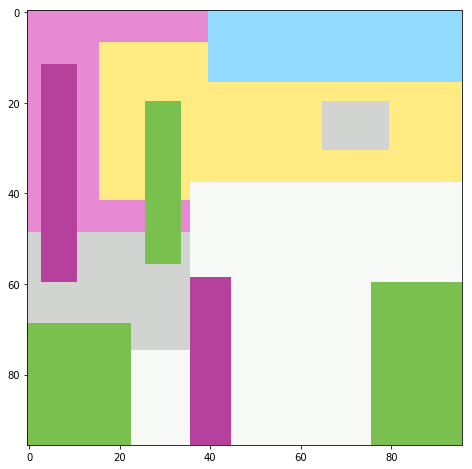

In [360]:
img_teste = imageio.imread("test_image.png")
plt.figure(figsize=(8,8))
_ = plt.imshow(img_teste)

In [384]:
def closest_centroid(matrix,centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((matrix - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [362]:
RGB = np.array(img_teste).reshape(96*96,3)
RGB.shape

(9216, 3)

In [446]:
random.seed(10)

ids = np.sort(random.sample(range(0, 9216), k=5))
cluster_centroids = RGB[ids]

while(len(np.unique(cluster_centroids, axis=0)) != len(cluster_centroids)):
    ids = np.sort(random.sample(range(0, 9216), k=5))
    cluster_centroids = RGB[ids]

cluster_centroids

array([[232, 137, 211],
       [210, 212, 210],
       [121, 192,  78],
       [247, 249, 247],
       [181,  65, 156]], dtype=uint8)

In [411]:
move_centroids(RGB, closest_centroid(RGB, cluster_centroids), cluster_centroids)

array([[232.        , 137.        , 211.        ],
       [176.56326531, 215.13469388, 233.51020408],
       [189.72308612, 214.05293062, 104.66866029],
       [247.        , 249.        , 247.        ],
       [181.        ,  65.        , 156.        ]])

In [472]:
img_gen = fourth_assignment("test_image.png", 1, 7, 12, 42)()
np.unique(img_gen, return_counts=True)

(array([  0. ,  42.5,  85. , 127.5, 170. , 212.5, 255. ]),
 array([ 896,  819, 1715,  740, 2700, 1629,  717], dtype=int64))

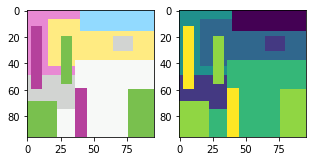

In [473]:
comparing_images(img_teste, img_gen)